In [38]:
import glob
import matplotlib.pyplot as plt
from skimage import io
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

In [2]:
clases = list(glob.glob("101_ObjectCategories/*/"))
dic = {}
for i in range(len(clases)):
    nombreClase = clases[i].split('\\')[1]
    directorio = "101_ObjectCategories/"+nombreClase+"/*.jpg"
    archivos = list(glob.iglob(directorio, recursive=True))
    listaImagenes = []
    for j in range(len(archivos)):
        img = io.imread(archivos[j])
        listaImagenes.append(img)
    dic[nombreClase] = listaImagenes

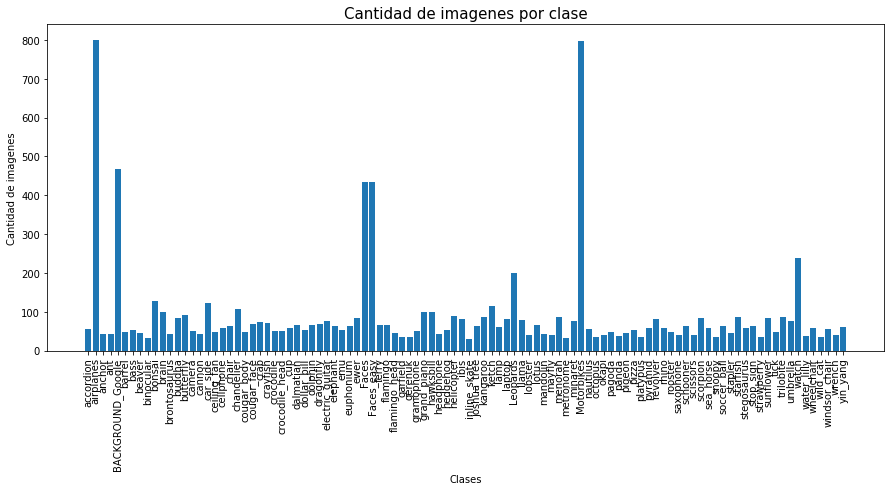

In [3]:
def graficaElementos(listaClases, listaAux):
    listaCuenta = []
    for i in range(len(listaClases)):
        valor = len(listaAux[i])
        listaCuenta.append(valor)
    plt.figure(figsize=(15, 6))
    plt.bar(listaClases, listaCuenta)
    plt.title("Cantidad de imagenes por clase",size=15)
    plt.xlabel("Clases")
    plt.xticks(rotation=90)
    plt.ylabel("Cantidad de imagenes")   
    
listaClases = list(dic.keys())
listaAux = list(dic.values())
graficaElementos(listaClases, listaAux)

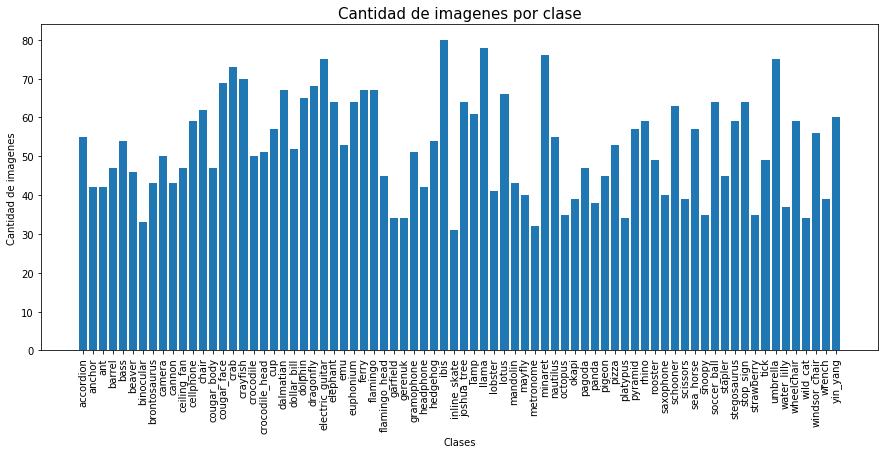

In [4]:
listaClases = list(dic.keys())
listaImagenes = list(dic.values())
listaCuenta = []
for i in range(len(listaClases)):
    valor = len(listaImagenes[i])
    if valor > 80:
        del dic[listaClases[i]]
listaClases = list(dic.keys())
listaAux = list(dic.values())
graficaElementos(listaClases, listaAux)

In [25]:
dicTrain = {}
dicValidation = {}
listaClases = list(dic.keys())
listaImagenes = list(dic.values())
for i in range(len(listaClases)):
    x_train, x_val = train_test_split(listaImagenes[i], test_size = 0.2, train_size = 0.8, shuffle = True)
    dicTrain[listaClases[i]] = x_train
    dicValidation[listaClases[i]] = x_val

In [26]:
listaClases = list(dic.keys())
listaImagenes = list(dic.values())
listaAux = []
datos = []
etiquetas = []
for i in range(len(listaClases)):
    listaAux = listaImagenes[i]
    for j in range(len(listaAux)):
        datos.append(listaAux[j])
        etiquetas.append(listaClases[i])

In [45]:
def compute_SIFT(imagen):
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(gray, None)
    img = cv2.drawKeypoints(gray, kp, imagen)
    return img